https://thefiddler.substack.com/p/can-you-play-the-price-is-right-continuously

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm.notebook import trange

In [2]:
def fiddler_tpir_wheel_xc(players=3, intial_threshold=1/2):

    spins_a = np.random.uniform(low=0, high=1, size=2)
    threshold = intial_threshold

    ledger = []

    player_a = spins_a[0]
    if player_a < threshold:
        player_a += spins_a[1]
    if player_a > 1:
        player_a = 0

    ledger.append(player_a)

    threshold = max(intial_threshold, player_a)
    player_set = range(1, players)

    for p in player_set:
        spins_z = np.random.uniform(low=0, high=1, size=2)

        # The last contestant only needs to beat the highest score
        if p == max(player_set):
            threshold = max(ledger)

        player_z = spins_z[0]
        if player_z < threshold:
            player_z += spins_z[1]
        if player_z > 1:
            player_z = 0

        ledger.append(player_z)

        threshold = max(ledger)
        threshold = max(threshold, intial_threshold)

    winner = max(ledger)
    a_wins = player_a == winner
    return a_wins

In [3]:
TRIALS = 10**6
contestant_set = range(2, 31)
contestants = []
register = []

In [4]:
for c in contestant_set:

    mc_xc = Parallel(n_jobs=-2)(delayed(fiddler_tpir_wheel_xc)(c, 1/2)
                                for j in trange(TRIALS, unit_scale=True,
                                                desc=str(c) + ' Contestants', 
                                                leave=False))

    win_perc = sum(mc_xc)/TRIALS
    contestants.append(c)
    register.append(win_perc)

2 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

3 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

4 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

5 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

6 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

7 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

8 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

9 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

10 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

11 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

12 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

13 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

14 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

15 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

16 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

17 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

18 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

19 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

20 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

21 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

22 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

23 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

24 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

25 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

26 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

27 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

28 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

29 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

30 Contestants:   0%|          | 0.00/1.00M [00:00<?, ?it/s]

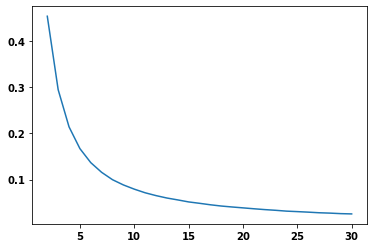

In [5]:
plt.plot(contestants, register)
plt.show()

In [6]:
tpir_df = pd.DataFrame(list(zip(contestants, register)),
                       columns=['Contestants', 'Win_Perc'])

format_mapping = {
    'Contestants': lambda x: f'{x:,}',
    'Win_Perc': lambda y: f'{y:,.3%}'
}
tpir_styled_df = tpir_df.style.format(format_mapping)
tpir_styled_df.hide()

Contestants,Win_Perc
2,45.293%
3,29.415%
4,21.382%
5,16.676%
6,13.644%
7,11.547%
8,9.956%
9,8.825%
10,7.916%
11,7.132%
